In [18]:
!pip install -r requirement.txt

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.1 MB/s  0:00:02 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.9 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.5 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


In [19]:
import pandas as pd
from sqlalchemy import create_engine
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# MySQL connection details
username = "root"
password = urllib.parse.quote_plus("Midhun@123")  # URL-encode special characters
host = "localhost"
port = "3306"
database = "fashion_europe_2025"

# Create the connection engine
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}")


In [5]:
dim_products_df = pd.read_sql("SELECT * FROM dim_products", con=engine)
print(dim_products_df.head())

   product_id        product_name  category brand  color size  catalog_price  \
0           1     Soft Wrap Dress   Dresses  Tiva  Green    S          40.41   
1           2       Soft Wrap Tee  T-Shirts  Tiva  White    S          78.45   
2           3      Soft Linen Tee  T-Shirts  Tiva  Green   XL          23.90   
3           4     Soft Ribbed Tee  T-Shirts  Tiva  White    S          60.00   
4           5  Soft Wrap Trousers     Pants  Tiva   Blue    M          36.84   

   cost_price  gender  
0       20.70  Female  
1       53.76  Female  
2       14.81  Female  
3       34.78  Female  
4       16.46  Female  


In [7]:
dim_products_df = pd.read_sql("SELECT * FROM dim_products", con=engine)
fact_sales_df = pd.read_sql("SELECT * FROM fact_sales", con=engine)
dim_channels_df = pd.read_sql("SELECT * FROM dim_channels", con=engine)
dim_campaigns_df = pd.read_sql("SELECT * FROM dim_campaigns", con=engine)

In [8]:
merged_df = fact_sales_df.merge(dim_products_df, on="product_id", how="left") \
                         .merge(dim_channels_df, on="channel_id", how="left") \
                         .merge(dim_campaigns_df, on="campaign_id", how="left")


In [20]:
sns.set_theme(style="whitegrid")

In [10]:
# Channel Performance Analysis
channel_performance = merged_df.groupby('channel_name').agg(
    total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum'),
    avg_order_value=pd.NamedAgg(column='item_total', aggfunc='mean')
).reset_index()

channel_performance = channel_performance.sort_values(by='total_revenue', ascending=False)
print(channel_performance)

  channel_name  total_revenue  total_quantity  avg_order_value
1   E-commerce      190753.66            3889       147.072984
0   App Mobile      164395.01            3456       140.628751


/tmp/ipykernel_58665/2569065872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_performance, x="total_revenue", y="channel_name", palette="viridis")


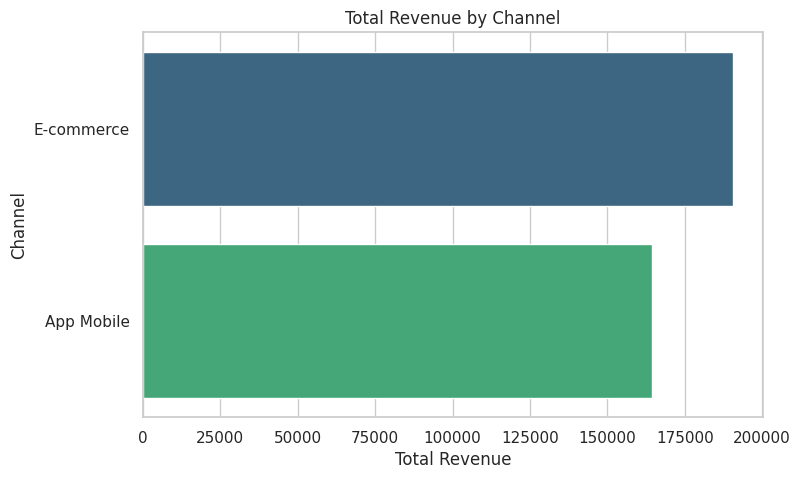

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data=channel_performance, x="total_revenue", y="channel_name", palette="viridis")
plt.title("Total Revenue by Channel")
plt.xlabel("Total Revenue")
plt.ylabel("Channel")
plt.show()

In [11]:
# Campaign Performance
campaign_performance = merged_df.groupby('campaign_name').agg(
    total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum')
).reset_index()

campaign_performance = campaign_performance.sort_values(by='total_revenue', ascending=False)

print("\nCampaign Performance:\n", campaign_performance)


Campaign Performance:
     campaign_name  total_revenue  total_quantity
3  Website Banner      189450.55            3859
0      App Mobile      154726.07            3188
2    Social Media        9668.94             268
1           Email        1303.11              30


/tmp/ipykernel_58665/2026494089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=campaign_performance, x="total_revenue", y="campaign_name", palette="mako")


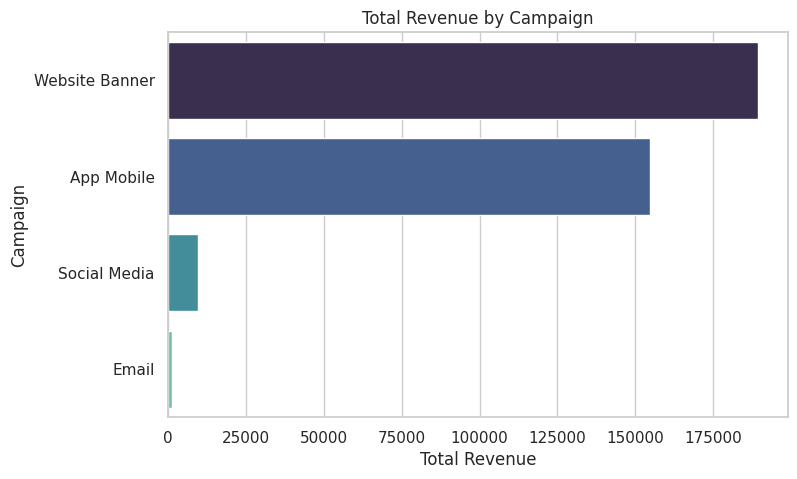

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=campaign_performance, x="total_revenue", y="campaign_name", palette="mako")
plt.title("Total Revenue by Campaign")
plt.xlabel("Total Revenue")
plt.ylabel("Campaign")
plt.show()

In [12]:
# Top Products by Revenue & Quantity
top_products = merged_df.groupby('product_name').agg(
    total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum')
).reset_index()

top_products_by_revenue = top_products.sort_values(by='total_revenue', ascending=False).head(10)
top_products_by_quantity = top_products.sort_values(by='total_quantity', ascending=False).head(10)

print("\nTop Products by Revenue:\n", top_products_by_revenue)
print("\nTop Products by Quantity:\n", top_products_by_quantity)



Top Products by Revenue:
                    product_name  total_revenue  total_quantity
378             Soft Silk Dress        2819.23              44
314        Relaxed Ribbed Dress        2736.22              43
482         Vintage Satin Shoes        2610.40              40
90               Dresses Drop 1        2563.20              40
318     Relaxed Ribbed Trousers        2379.30              36
208  Modern High-Waist Trousers        1907.66              26
122          Elegant Ribbed Tee        1882.72              39
12        Bold High-Waist Dress        1804.08              24
52           Classic Crew Shoes        1786.89              39
475        Vintage Ribbed Dress        1786.34              37

Top Products by Quantity:
              product_name  total_revenue  total_quantity
196   Modern Cotton Shoes        1445.54              46
378       Soft Silk Dress        2819.23              44
314  Relaxed Ribbed Dress        2736.22              43
90         Dresses Drop 

/tmp/ipykernel_58665/2098406350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_by_revenue, x="total_revenue", y="product_name", palette="plasma")


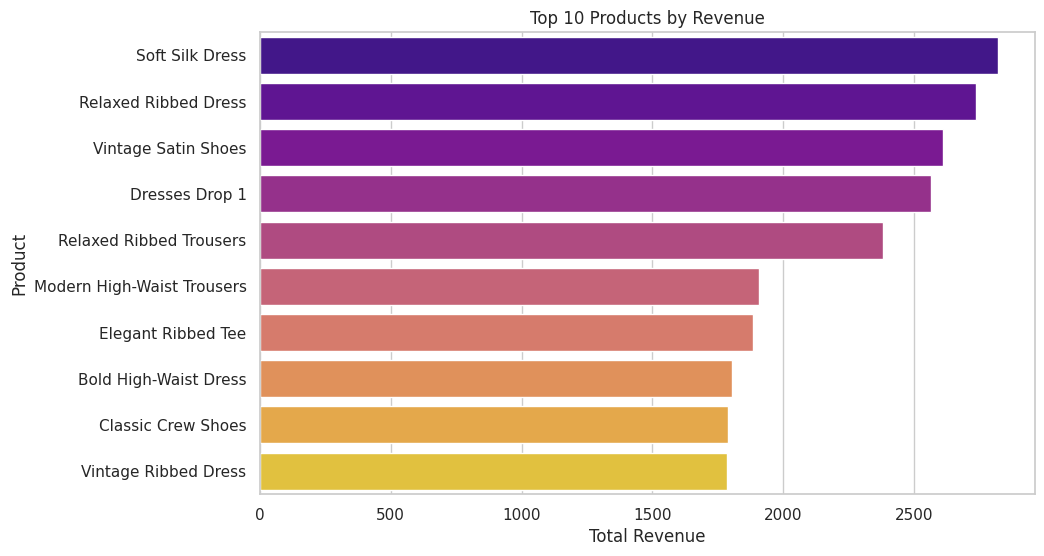

/tmp/ipykernel_58665/2098406350.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_by_quantity, x="total_quantity", y="product_name", palette="cividis")


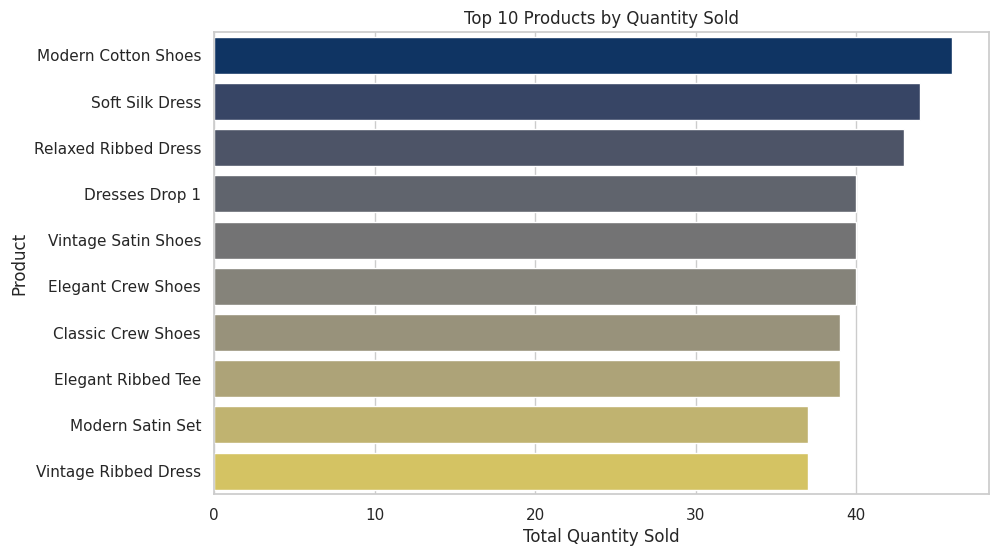

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_products_by_revenue, x="total_revenue", y="product_name", palette="plasma")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=top_products_by_quantity, x="total_quantity", y="product_name", palette="cividis")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()

In [13]:
# Create price bands
def price_band(price):
    if price < 50:
        return "Low"
    elif 50 <= price < 100:
        return "Medium"
    else:
        return "High"

merged_df['price_band'] = merged_df['unit_price'].apply(price_band)

# Profit margin
merged_df['profit_margin'] = merged_df['unit_price'] - merged_df['cost_price']

price_band_performance = merged_df.groupby('price_band').agg(
    avg_margin=pd.NamedAgg(column='profit_margin', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum')
).reset_index()

print("\nPrice Band & Profitability:\n", price_band_performance)



Price Band & Profitability:
   price_band  avg_margin  total_revenue  total_quantity
0        Low   16.532080      150778.82            3934
1     Medium   26.584759      204369.85            3411


/tmp/ipykernel_58665/3427263084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_band_performance, x="price_band", y="total_revenue", palette="coolwarm")


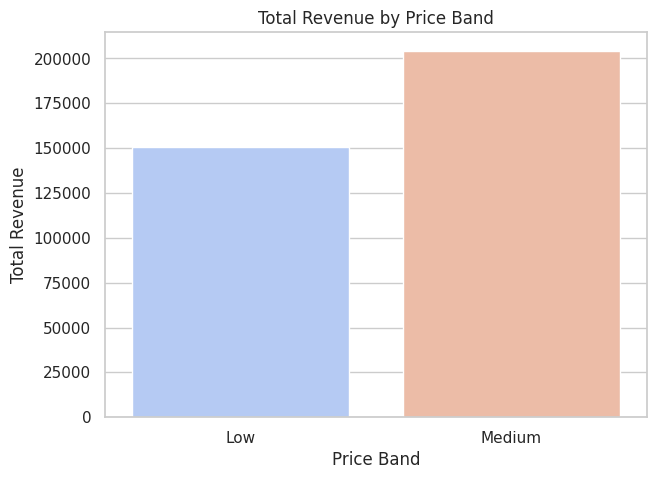

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(data=price_band_performance, x="price_band", y="total_revenue", palette="coolwarm")
plt.title("Total Revenue by Price Band")
plt.xlabel("Price Band")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:
# Category Performance
category_performance = merged_df.groupby('category').agg(
    total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum')
).reset_index().sort_values(by='total_revenue', ascending=False)
print("\nCategory Performance:\n", category_performance)

# Brand Pplt.figure(figsize=(7,5))
sns.barplot(data=price_band_performance, x="price_band", y="total_revenue", palette="coolwarm")
plt.title("Total Revenue by Price Band")
plt.xlabel("Price Band")
plt.ylabel("Total Revenue")
plt.show()erformance this dataset only had one brand in future update if you have more barnd use this to analyse
# brand_performance = merged_df.groupby('brand').agg(
#     total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum')
# ).reset_index().sort_values(by='total_revenue', ascending=False)

# print("\nBrand Performance:\n", brand_performance)



Category Performance:
     category  total_revenue
0    Dresses       78006.49
2      Shoes       77957.26
4   T-Shirts       74310.75
3  Sleepwear       66724.78
1      Pants       58149.39


/tmp/ipykernel_58665/1658486235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_performance, x="total_revenue", y="category", palette="cubehelix")


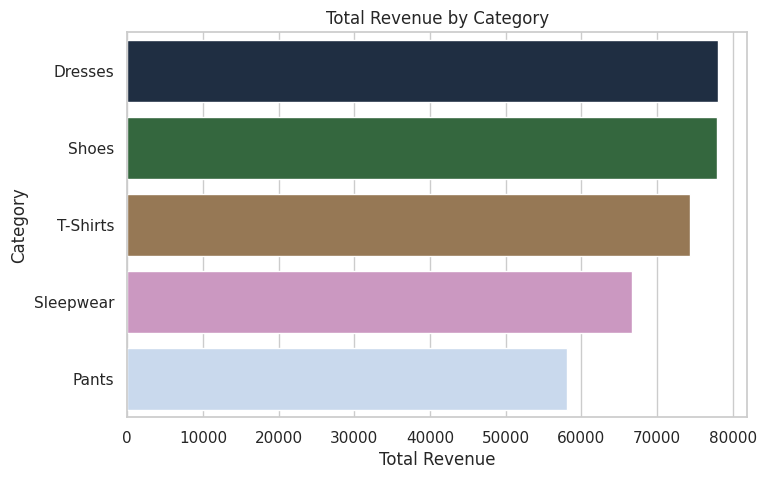

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=category_performance, x="total_revenue", y="category", palette="cubehelix")
plt.title("Total Revenue by Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.show()

In [ ]:
# Gender Performance if the datset have both female and male or other use this to analyse 
# while working this data it only had female
# gender_performance = merged_df.groupby('gender').agg(
#     total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum'),
#     total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum')
# ).reset_index()

# print("\nGender-based Purchase Trends:\n", gender_performance)


In [26]:
# Product Size Performance
size_performance = merged_df.groupby('size').agg(
    total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum')
).reset_index().sort_values(by='total_revenue', ascending=False)

print("\nSize Performance:\n", size_performance)


Size Performance:
   size  total_revenue  total_quantity
8   XS       75504.05            1574
4    L       58164.53            1181
6    S       56420.08            1192
7   XL       54098.55            1128
5    M       50127.64            1035
2   38       17152.25             327
0   35       15350.66             307
1   36       14555.85             325
3   40       13775.06             276


/tmp/ipykernel_58665/1525941483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_performance, x="total_revenue", y="size", palette="viridis")


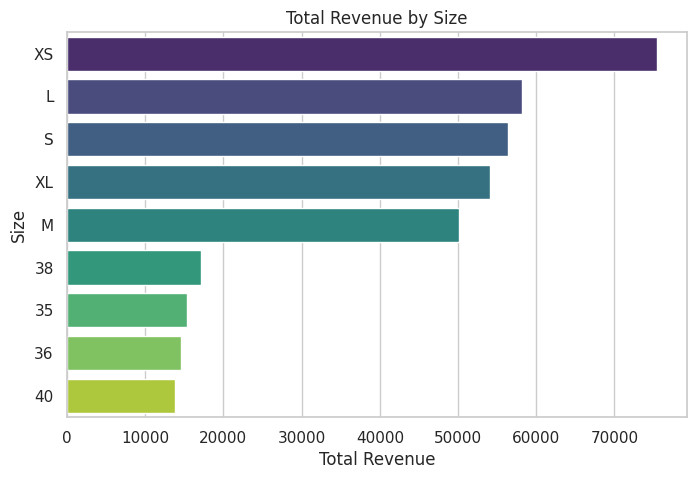

In [27]:

plt.figure(figsize=(8,5))
sns.barplot(data=size_performance, x="total_revenue", y="size", palette="viridis")
plt.title("Total Revenue by Size")
plt.xlabel("Total Revenue")
plt.ylabel("Size")
plt.show()

In [28]:
# color preferance
color_performance = merged_df.groupby('color').agg(
    total_revenue=pd.NamedAgg(column='item_total', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum')
).reset_index().sort_values(by='total_revenue', ascending=False)

print("\nColor Performance:\n", color_performance)


Color Performance:
    color  total_revenue  total_quantity
2  Green       79333.35            1625
1   Blue       72446.46            1551
3    Red       72351.58            1456
0  Black       68516.40            1447
4  White       62500.88            1266


/tmp/ipykernel_58665/809661553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_performance, x="total_revenue", y="color", palette="cubehelix")


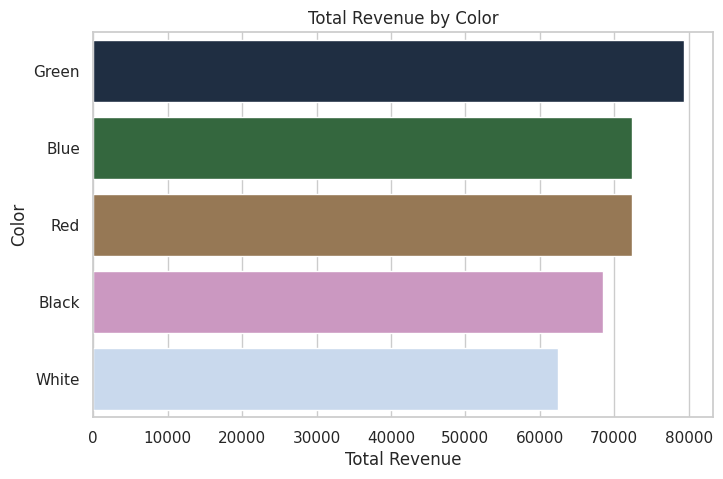

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=color_performance, x="total_revenue", y="color", palette="cubehelix")
plt.title("Total Revenue by Color")
plt.xlabel("Total Revenue")
plt.ylabel("Color")
plt.show()

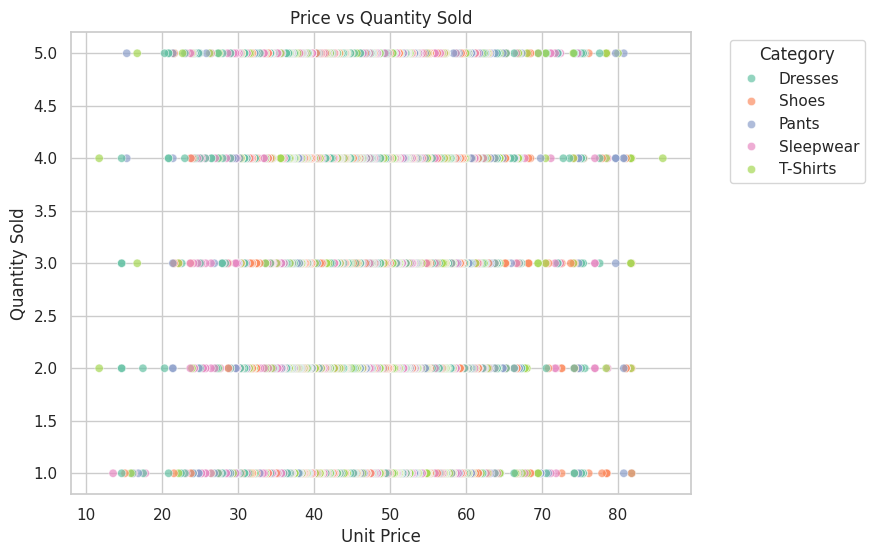

In [30]:
# Price Sensitivity

plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="unit_price", y="quantity", hue="category", alpha=0.7, palette="Set2")
plt.title("Price vs Quantity Sold")
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

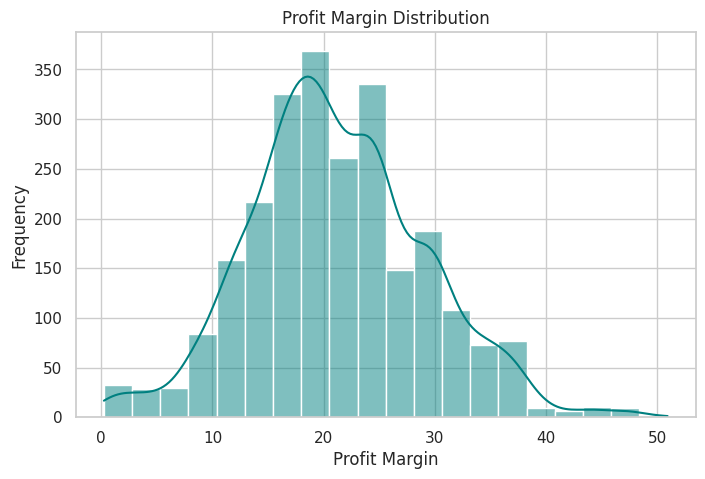

In [31]:
# Profit Margin Distribution
plt.figure(figsize=(8,5))
sns.histplot(merged_df['profit_margin'], bins=20, kde=True, color='teal')
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.show()